In [21]:
PROMPT = """
Bạn là một trợ lý AI có nhiệm vụ mô tả một người trong hình ảnh. Hãy tạo một chú thích chi tiết theo các hướng dẫn sau.

Hãy quan sát kỹ hình ảnh bên dưới và mô tả lại một cách chi tiết, đầy đủ và khách quan bằng tiếng Việt. Miêu tả rõ:
– Những sự vật, con người, động vật… có mặt trong ảnh.
– Hành động, tư thế, tương tác giữa các đối tượng nếu có.
– Màu sắc, trang phục, biểu cảm gương mặt, ánh sáng, thời gian (nếu đoán được).
– Bối cảnh xung quanh: địa điểm, không gian (trong nhà/ngoài trời), thời tiết, môi trường…
– Bất kỳ chi tiết nào nổi bật hoặc thú vị trong ảnh.

Không thêm suy đoán không có cơ sở. Chỉ mô tả những gì nhìn thấy rõ trong ảnh.

## Ví dụ:

Dưới đây là một chú thích mẫu:
Ví dụ 1: "Một người đàn ông trung niên đang đứng trên vỉa hè vào ban ngày. Anh mặc áo sơ mi trắng, quần âu tối màu và đeo kính râm. Gương mặt nghiêm túc, ánh mắt nhìn về phía trước. Phía sau là một dãy nhà phố và vài chiếc xe hơi đang đỗ bên đường"
Ví dụ 2: "Một con phố trung tâm đông đúc vào giờ tan tầm. Hàng chục người đang đi bộ vội vã trên vỉa hè, nhiều người mặc áo sơ mi, đeo balo hoặc cầm điện thoại. Các phương tiện chen chúc nhau trên lòng đường, còi xe vang lên inh ỏi. Các biển hiệu quảng cáo sáng rực và cửa hàng hai bên tấp nập khách ra vào"
Ví dụ 3: "Bên trong một khu chợ truyền thống đông đúc, người bán và người mua chen nhau trong không gian chật hẹp. Các sạp hàng đầy ắp rau củ, thịt cá, và đồ khô được bày ra san sát nhau. Tiếng rao bán, tiếng trả giá vang lên hỗn loạn. Không khí náo nhiệt và có phần oi bức, ánh sáng lờ mờ từ các bóng đèn treo lủng lẳng phía trên"

Hãy sử dụng ví dụ này để tham khảo về phong cách và cấu trúc, nhưng **không sao chép các chi tiết cụ thể**. **Bỏ qua các yếu tố bất thường trong ví dụ nếu chúng không liên quan**. Luôn mô tả người trong ảnh một cách **trung thực và toàn diện**.

Chỉ trả về câu caption hoàn chỉnh không thêm hướng dẫn gì thêm.
"""

In [22]:
from typing import Optional

def generate_content(client, model_name, image_url, prompt, temperature=0.7, top_p=0.9, detail: Optional[str]="high"):
    response = client.chat.completions.create(
        model=model_name,
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": prompt,
                    },
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": image_url,
                            **({"detail": detail} if detail else {}),
                        },
                    },
                ],
            }
        ],
        temperature=temperature,
        top_p=top_p,
    )

    return response.choices[0].message.content

In [23]:
from openai import OpenAI

client = OpenAI(api_key="YOUR_API_KEY", base_url="http://0.0.0.0:8000/v1")
# model_name = client.models.list().data[0].id
model_name = 'OpenGVLab/InternVL3-14B-AWQ'

In [25]:
# from pathlib import Path

# def list_sorted_images(folder):
#     # Define common image extensions
#     image_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp'}

#     folder_path = Path(folder)
#     # Get all image files in folder and subfolders
#     image_files = [f for f in folder_path.rglob('*') if f.suffix.lower() in image_extensions]

#     # Sort the files (by path)
#     sorted_images = sorted(image_files)

#     # Return as list of strings (paths)
#     return [str(f) for f in sorted_images]

# def gen_image_url(file):
#     return f"http://0.0.0.0:8001/{file}"

In [26]:
# import os
# import unicodedata

# def strip_accents_and_spaces(text):
#     """
#     Remove accents and spaces from Vietnamese names.
#     E.g., "Việt Nam file.txt" → "VietNamfile.txt"
#     """
#     # Remove accents
#     text = unicodedata.normalize('NFD', text)
#     text = ''.join(char for char in text if unicodedata.category(char) != 'Mn')
#     # Remove all spaces
#     text = text.replace(' ', '')
#     return text

# def rename_all(root_path):
#     # Rename files and folders bottom-up to avoid path issues
#     for current_path, dirnames, filenames in os.walk(root_path, topdown=False):
#         # Rename files
#         for filename in filenames:
#             old_file_path = os.path.join(current_path, filename)
#             new_file_name = strip_accents_and_spaces(filename)
#             new_file_path = os.path.join(current_path, new_file_name)
#             if old_file_path != new_file_path:
#                 print(f"Renaming file: {old_file_path} → {new_file_path}")
#                 os.rename(old_file_path, new_file_path)

#         # Rename subfolders
#         for dirname in dirnames:
#             old_dir_path = os.path.join(current_path, dirname)
#             new_dir_name = strip_accents_and_spaces(dirname)
#             new_dir_path = os.path.join(current_path, new_dir_name)
#             if old_dir_path != new_dir_path:
#                 print(f"Renaming folder: {old_dir_path} → {new_dir_path}")
#                 os.rename(old_dir_path, new_dir_path)

#     # Rename root folder last
#     parent_dir = os.path.dirname(root_path)
#     root_name = os.path.basename(root_path)
#     new_root_name = strip_accents_and_spaces(root_name)
#     new_root_path = os.path.join(parent_dir, new_root_name)
#     if root_path != new_root_path:
#         print(f"Renaming root folder: {root_path} → {new_root_path}")
#         os.rename(root_path, new_root_path)

# rename_all('HINH ANH')

In [27]:
# !pip3 install 'numpy<2'

In [28]:
# import os
# import sys
# import random
# import time
# from collections import defaultdict

# import cv2
# import matplotlib.pyplot as plt

# files = defaultdict(list)
# for file in list_sorted_images('HINHANH'):
#     if '.ipynb_checkpoints' in file:
#         continue
#     files[file.split('/')[1]].append(file)

# for image_type, files in files.items():
#     for file in random.choices(files, k=3):
#         print(file)
#         image = cv2.imread(file)
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         plt.imshow(image)
#         plt.axis('off')
#         plt.show()

#         start_time = time.time()
#         caption = generate_content(client, model_name, gen_image_url(file), PROMPT, temperature=0.6, top_p=0.8)
#         end_time = time.time()
#         print(caption)
#         print(end_time - start_time)

In [29]:
import base64, textwrap, time, openai, os, io
from PIL import Image
from typing import Tuple

def process_image(path: str, max_size: int) -> Tuple[str, int]:
    """
    Process an image from a given path, encoding it in base64. If the image is a PNG and smaller than max_size,
    it encodes the original. Otherwise, it resizes and converts the image to PNG before encoding.

    Parameters:
        path (str): The file path to the image.
        max_size (int): The maximum width and height allowed for the image.

    Returns:
        Tuple[str, int]: A tuple containing the base64-encoded image and the size of the largest dimension.
    """
    with Image.open(path) as image:
        width, height = image.size
        mimetype = image.get_format_mimetype()
        if mimetype == "image/png" and width <= max_size and height <= max_size:
            with open(path, "rb") as f:
                encoded_image = base64.b64encode(f.read()).decode('utf-8')
                return (encoded_image, max(width, height))
        else:
            resized_image = resize_image(image, max_size)
            png_image = convert_to_png(resized_image)
            return (base64.b64encode(png_image).decode('utf-8'),
                    max(width, height)  # same tuple metadata
                   )

def resize_image(image: Image.Image, max_dimension: int) -> Image.Image:
    """
    Resize a PIL image to ensure that its largest dimension does not exceed max_size.

    Parameters:
        image (Image.Image): The PIL image to resize.
        max_size (int): The maximum size for the largest dimension.

    Returns:
        Image.Image: The resized image.
    """
    width, height = image.size

    # Check if the image has a palette and convert it to true color mode
    if image.mode == "P":
        if "transparency" in image.info:
            image = image.convert("RGBA")
        else:
            image = image.convert("RGB")

    if width > max_dimension or height > max_dimension:
        if width > height:
            new_width = max_dimension
            new_height = int(height * (max_dimension / width))
        else:
            new_height = max_dimension
            new_width = int(width * (max_dimension / height))
        image = image.resize((new_width, new_height), Image.LANCZOS)
        
        timestamp = time.time()

    return image

def convert_to_png(image: Image.Image) -> bytes:
    """
    Convert a PIL Image to PNG format.

    Parameters:
        image (Image.Image): The PIL image to convert.

    Returns:
        bytes: The image in PNG format as a byte array.
    """
    with io.BytesIO() as output:
        image.save(output, format="PNG")
        return output.getvalue()

def create_image_content(image, maxdim, detail_threshold) -> Tuple[str, str]:
    detail = "low" if maxdim < detail_threshold else "high"
    return f"data:image/png;base64,{image}", detail

In [30]:
!pip3 install matplotlib opencv-python

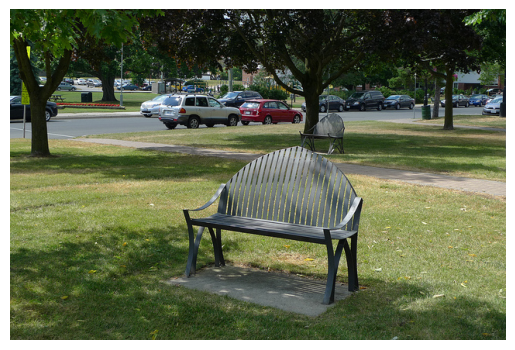

Hình ảnh này chụp một khu vực công viên ngoài trời với một chiếc ghế băng kim loại đặt trên bãi cỏ xanh. Chiếc ghế có thiết kế hiện đại, màu xám, với phần lưng tựa cong hình vòm. Xung quanh là những cây lớn tỏa bóng mát, tạo ra những mảng bóng râm trên mặt cỏ. Phía xa là một con đường với nhiều chiếc xe hơi đang di chuyển hoặc đỗ bên lề. Các loại xe bao gồm xe SUV, sedan, và một số xe khác. Không có người xuất hiện trong ảnh. Bối cảnh cho thấy đây là một ngày nắng, với ánh sáng tự nhiên chiếu sáng rõ ràng, tạo ra các bóng đổ trên mặt đất. Không gian xung quanh là một khu vực đô thị với cây cối và đường phố, tạo cảm giác yên bình và thoáng đãng.


In [31]:
import cv2
import tempfile
import requests
import matplotlib.pyplot as plt

# Create a temporary file to store the downloaded image
image_url = "https://raw.githubusercontent.com/open-mmlab/mmdeploy/main/demo/resources/det.jpg"

# Download the image and save to temporary file
with tempfile.NamedTemporaryFile(suffix='.jpg') as temp_file:
    # Download the image
    response = requests.get(image_url)
    response.raise_for_status()  # Raise an exception for bad status codes
    
    # Write the image data to the temporary file
    temp_file.write(response.content)
    temp_file.flush()
    
    image = cv2.imread(temp_file.name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    # Process the image
    image_content, maxdim = process_image(temp_file.name, 1024)
    image_content, detail = create_image_content(image_content, maxdim, 1024)
    
    caption = generate_content(client, model_name, image_content, PROMPT, temperature=0.6, top_p=0.8, detail=detail)
    print(caption)

In [33]:
generate_content(client, model_name, "https://raw.githubusercontent.com/open-mmlab/mmdeploy/main/demo/resources/det.jpg", PROMPT, temperature=0.6, top_p=0.8)

'Một công viên yên tĩnh với hai chiếc ghế băng dài bằng kim loại đặt trên bãi cỏ xanh mướt. Một chiếc ghế ở gần trung tâm bức ảnh, không có ai ngồi, trong khi chiếc ghế thứ hai nằm xa hơn về phía phải, cũng không có người. Xung quanh là những cây lớn tỏa bóng mát, tạo nên không gian thoáng đãng và mát mẻ. Phía xa là một con đường với nhiều xe hơi đang di chuyển hoặc đỗ bên lề, bao gồm các loại xe khác nhau như SUV, sedan và hatchback. Màu sắc chủ đạo của các phương tiện là trắng, đỏ và xám. Không gian xung quanh là một khu vực đô thị với cây cối và vỉa hè rộng rãi. Ánh sáng tự nhiên chiếu rọi, tạo ra các mảng bóng mát trên cỏ và ghế. Không có người hay động vật nào xuất hiện trong hình ảnh này, tạo nên một khung cảnh tĩnh lặng và thanh bình.'